# import necessary modules

In [1]:
import pandas as pd                                       #For reading the data
from sklearn.preprocessing import LabelEncoder            #For converting categorical to numeric data
from sklearn.model_selection import train_test_split      #Splitting the data
from sklearn.preprocessing import StandardScaler          #feature scaling
from sklearn.naive_bayes import GaussianNB                #Creating a NB classifier
from sklearn import metrics                               #Evaluating your model

# Load the dataset
Dataset is available at /data/ipone_purchase_data.csv

--Tab separated data

In [2]:
df = pd.read_csv("./data/iphone_purchase_data.csv",delimiter = "\t")

#View first five rows of the df
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


Let us now look into the descriptive statistics to figure out the quartiles, sum and entire data population spread-out:


In [3]:
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Visulaising the data

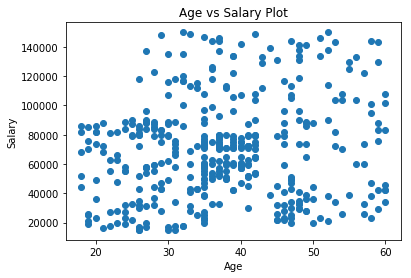

In [17]:
#Create a scatter plot for age vs salary 
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,1],df.iloc[:,2])
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary Plot")
plt.show()

Split the data into two part: one who buys phone and other who did't for better visualisation of data

In [24]:
x_buys = df[df.iloc[:,3]==1]
x_not_buys = df[df.iloc[:,3]==0]

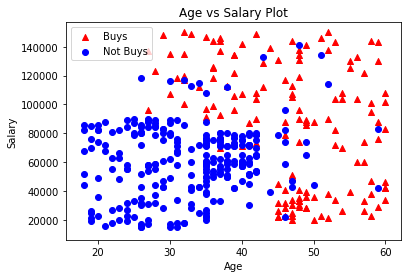

In [29]:
#Create a scatter plot for age vs salary 
plt.scatter(x_buys.iloc[:,1],x_buys.iloc[:,2],color = "red",label  = "Buys", marker = "^")
plt.scatter(x_not_buys.iloc[:,1],x_not_buys.iloc[:,2],color = "blue",label = "Not Buys")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary Plot")
plt.legend()
plt.show()

### Convert Categorical Data  (Gender) to Numeric Data (Number)

In [4]:
# Dividing the df dataset into Labels and Features
X = df.iloc[:,:-1]
y = df.iloc[:,3]

In [5]:
#Convert gender to numbers 
#AS the Naive Bayes classification algorithm’s cannot handle categorical (text) data
labelEncoder_gender =  LabelEncoder()
X.iloc[:,0] = labelEncoder_gender.fit_transform(X.iloc[:,0])

In [6]:
#Lets view top 5 rows of our Labels
X.head()

,Gender,Age,Salary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


# Splitting the dataset

In [7]:
#Splitting the data into training and testing data 
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.25,
                                                random_state = 0)

In [8]:
#Displaying the size of our training and testing dataset

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))


Number of rows in the total set: 400
Number of rows in the training set: 300
Number of rows in the test set: 100


# Feature Scaling

In [35]:
#Since the independent variables are of different scale, it’s important to do feature scaling
SS_X = StandardScaler()
X_train = SS_X.fit_transform(X_train)
X_test = SS_X.transform(X_test)

# Fit Naive Bayes Classifier

In [39]:
NB_classifier = GaussianNB()
NB_classifier.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

# Make Predictions

In [40]:
y_pred = NB_classifier.predict(X_test)

# Evaluate Performance of the Model

In [42]:
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred) 
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred) 
print("Recall score:",recall)

[[66  2]
 [ 7 25]]
Accuracy score: 0.91
Precision score: 0.9259259259259259
Recall score: 0.78125


In [53]:

def draw_learning_curves(X2, y2, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()

In [54]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

C:\Users\me\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


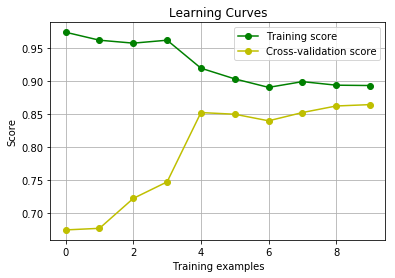

In [55]:
draw_learning_curves(X,y,NB_classifier,10)